In [122]:
import pandas as pd
import numpy as np

df = pd.read_csv("Dataset.csv")
print("✅ Dataset loaded successfully!")
df.columns = df.columns.str.lower().astype(str)


✅ Dataset loaded successfully!


In [123]:
np.random.seed(42)
df['survived'] = np.random.choice([0, 1], size=len(df), p=[0.62, 0.38])

print("📊 Displaying dataset information:")
print(df.info())

📊 Displaying dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  418 non-null    int64  
 1   pclass       418 non-null    int64  
 2   name         418 non-null    object 
 3   sex          418 non-null    object 
 4   age          332 non-null    float64
 5   sibsp        418 non-null    int64  
 6   parch        418 non-null    int64  
 7   ticket       418 non-null    object 
 8   fare         417 non-null    float64
 9   cabin        91 non-null     object 
 10  embarked     418 non-null    object 
 11  survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [124]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   passengerid  pclass                                          name     sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    age  sibsp  parch   ticket     fare cabin embarked  survived  
0  34.5      0      0   330911   7.8292   NaN        Q         0  
1  47.0      1      0   363272   7.0000   NaN        S         1  
2  62.0      0      0   240276   9.6875   NaN        Q         1  
3  27.0      0      0   315154   8.6625   NaN        S         0  
4  22.0      1      1  3101298  12.2875   NaN        S         0  


In [125]:
print("Number of duplicated rows:")
print(df.duplicated().sum())

if df.duplicated().sum() == 0:
    print("No need to remove duplicates.")

Number of duplicated rows:
0
No need to remove duplicates.


In [126]:
print("Descriptive statistics for numerical columns:")
print(df.describe())

Descriptive statistics for numerical columns:
       passengerid      pclass         age       sibsp       parch  \
count   418.000000  418.000000  332.000000  418.000000  418.000000   
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   
std     120.810458    0.841838   14.181209    0.896760    0.981429   
min     892.000000    1.000000    0.170000    0.000000    0.000000   
25%     996.250000    1.000000   21.000000    0.000000    0.000000   
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   
max    1309.000000    3.000000   76.000000    8.000000    9.000000   

             fare    survived  
count  417.000000  418.000000  
mean    35.627188    0.392344  
std     55.907576    0.488858  
min      0.000000    0.000000  
25%      7.895800    0.000000  
50%     14.454200    0.000000  
75%     31.500000    1.000000  
max    512.329200    1.000000  


In [127]:
df.drop(columns=['passengerid'])
print(df.columns)

Index(['passengerid', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'survived'],
      dtype='object')


In [128]:
print(df.isnull().sum())

passengerid      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
survived         0
dtype: int64


In [129]:
print("Handling missing values...")

df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())
df['cabin'] = df['cabin'].fillna('unknown')
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

print("✅ Missing values handled successfully!")
print(df.isnull().sum())


Handling missing values...
✅ Missing values handled successfully!
passengerid    0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin          0
embarked       0
survived       0
dtype: int64


In [130]:
df['pclass'] = df['pclass'].astype('category')
df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')

In [131]:
import numpy as np

df["age_group"] = np.where(df["age"] < 20, "<20",
np.where(df["age"] <= 60, "20-40", ">40"))
print(df["age_group"].value_counts())

df.columns

age_group
20-40    346
<20       61
>40       11
Name: count, dtype: int64


Index(['passengerid', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'survived', 'age_group'],
      dtype='object')

In [132]:
print("🚹🚺 Passenger count by gender:")
print(df['sex'].value_counts())
print("\nPercentage distribution by gender:")
gender_percent = (df['sex'].value_counts(normalize=True) * 100).round(2)
print(gender_percent.astype(str) + '%')

🚹🚺 Passenger count by gender:
sex
male      266
female    152
Name: count, dtype: int64

Percentage distribution by gender:
sex
male      63.64%
female    36.36%
Name: proportion, dtype: object


In [133]:
print("Passenger count by class:")
print(df['pclass'].value_counts().sort_index())
print("\nPercentage distribution by class:")
print(df['pclass'].value_counts(normalize=True).sort_index() * 100)


Passenger count by class:
pclass
1    107
2     93
3    218
Name: count, dtype: int64

Percentage distribution by class:
pclass
1    25.598086
2    22.248804
3    52.153110
Name: proportion, dtype: float64


In [134]:
print("👶🧓 Passenger count by age group:")
print(df['age_group'].value_counts().sort_index())
print("\nPercentage distribution by age group:")
print(df['age_group'].value_counts(normalize=True).sort_index() * 100)


👶🧓 Passenger count by age group:
age_group
20-40    346
<20       61
>40       11
Name: count, dtype: int64

Percentage distribution by age group:
age_group
20-40    82.775120
<20      14.593301
>40       2.631579
Name: proportion, dtype: float64


In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

📊 Visualizing gender distribution, survival rates, and pie chart side by side...


C:\Users\ziyad\AppData\Local\Temp\ipykernel_6524\1708682866.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='Set2', ax=axes[0])
C:\Users\ziyad\AppData\Local\Temp\ipykernel_6524\1708682866.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='survived', data=df, palette='Set2', ax=axes[1], estimator='mean')


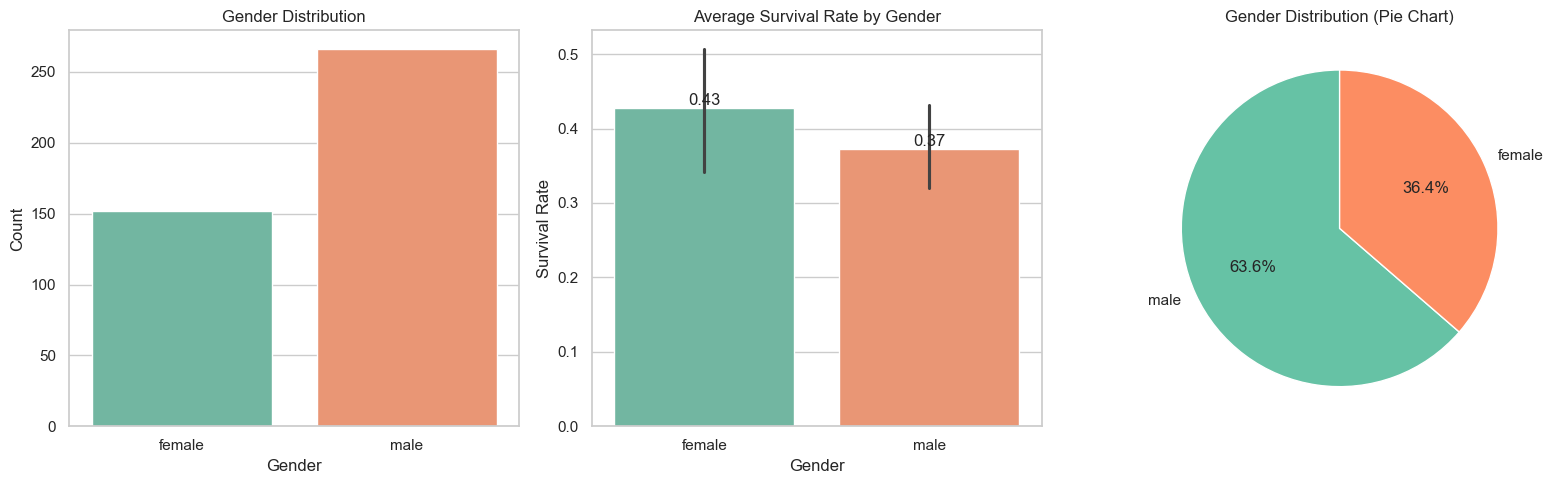

In [136]:
print("📊 Visualizing gender distribution, survival rates, and pie chart side by side...")

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='sex', data=df, palette='Set2', ax=axes[0])
axes[0].set_title("Gender Distribution")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Count")

sns.barplot(x='sex', y='survived', data=df, palette='Set2', ax=axes[1], estimator='mean')
axes[1].set_title("Average Survival Rate by Gender")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Survival Rate")

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f', label_type='edge')

gender_counts = df['sex'].value_counts()
axes[2].pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('Set2')
)
axes[2].set_title("Gender Distribution (Pie Chart)")

plt.tight_layout()
plt.show()


Visualizing passenger class distribution...


C:\Users\ziyad\AppData\Local\Temp\ipykernel_6524\3861282311.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pclass', data=df, palette='pastel')


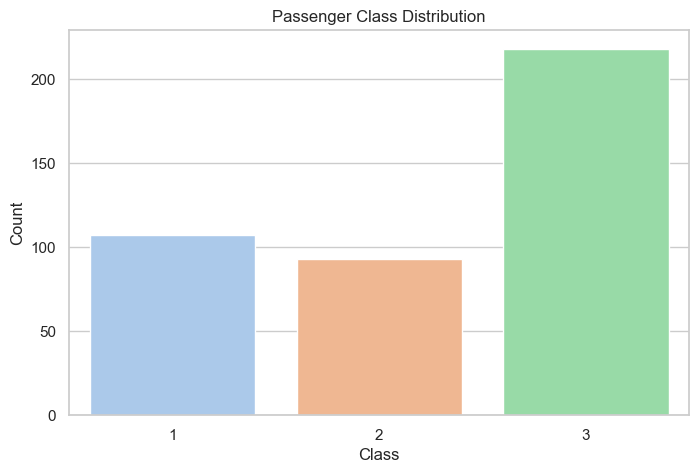

In [137]:
print("Visualizing passenger class distribution...")

sns.countplot(x='pclass', data=df, palette='pastel')
plt.title("Passenger Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Visualizing age group distribution and survival rates side by side...


C:\Users\ziyad\AppData\Local\Temp\ipykernel_6524\1044042915.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_group', data=df, palette='cool', ax=axes[0])
C:\Users\ziyad\AppData\Local\Temp\ipykernel_6524\1044042915.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='survived', data=df, palette='cool', ax=axes[1], estimator='mean')


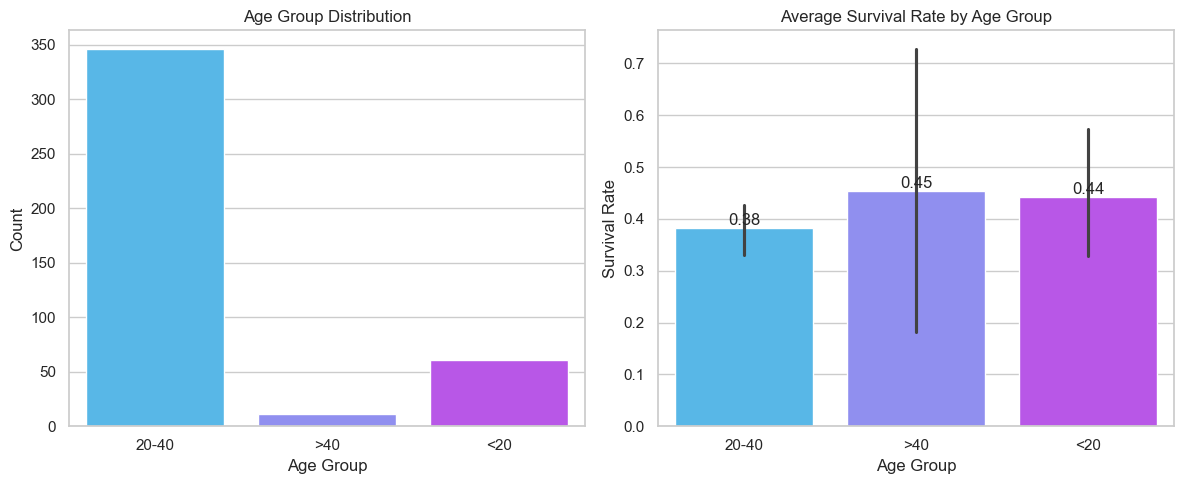

In [138]:
print("Visualizing age group distribution and survival rates side by side...")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='age_group', data=df, palette='cool', ax=axes[0])
axes[0].set_title("Age Group Distribution")
axes[0].set_xlabel("Age Group")
axes[0].set_ylabel("Count")

sns.barplot(x='age_group', y='survived', data=df, palette='cool', ax=axes[1], estimator='mean')
axes[1].set_title("Average Survival Rate by Age Group")
axes[1].set_xlabel("Age Group")
axes[1].set_ylabel("Survival Rate")

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f', label_type='edge')

plt.tight_layout()
plt.show()


Visualizing Fare distribution by Passenger Class...


C:\Users\ziyad\AppData\Local\Temp\ipykernel_6524\2599931090.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='fare', data=df, palette='Set3')


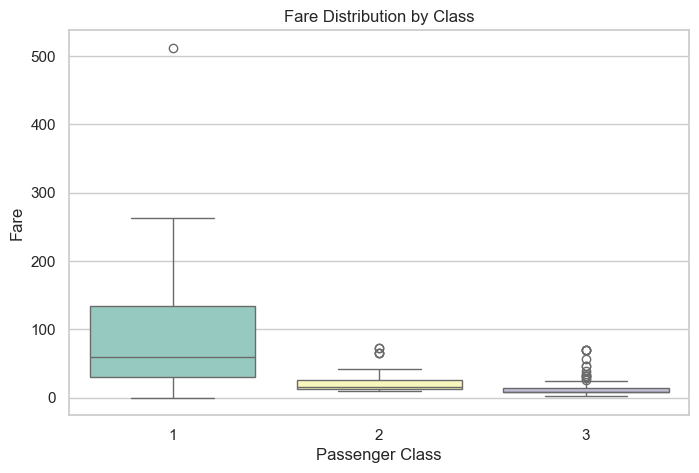

In [139]:
print("Visualizing Fare distribution by Passenger Class...")

sns.boxplot(x='pclass', y='fare', data=df, palette='Set3')
plt.title("Fare Distribution by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()

Visualizing correlations between numeric variables...


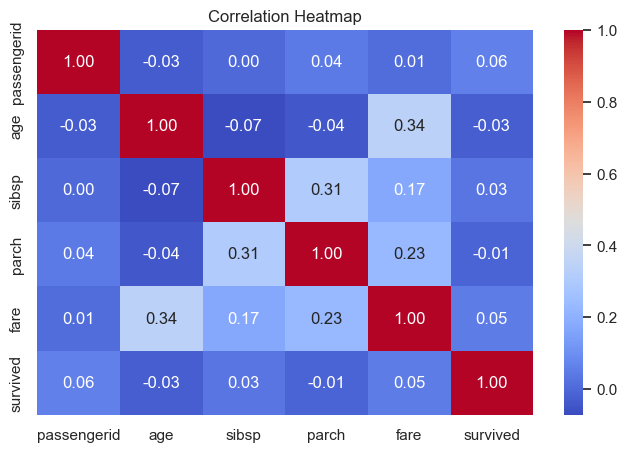

In [140]:
print("Visualizing correlations between numeric variables...")

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [141]:
df.to_csv("Titanic_cleaned.csv", index=False)
print("✅ Dataset saved successfully as 'Titanic_cleaned.csv'")

✅ Dataset saved successfully as 'Titanic_cleaned.csv'
